#Machine Learning Estad√≠stico para Interfaces Cerebro-Computadora

## Trabajo Pr√°ctico de Laboratorio de Computaci√≥n I: Introducci√≥n al procesamiento de EEG y paradigmas de BCI

Este TPLC tiene como objetivo que el alumno sea capaz de:
1. Afianzar los conocimientos sobre BCI aprendidos en el encuentro te√≥rico.
2. Implementar algoritmos b√°sicos para el pre-procesamiento de las se√±ales.
3. Comprender la caracterƒ±ÃÅsticas de los diferentes marcadores neurofisiol√≥gicos utilizados en BCI.


Es **requisito** para aprobar este curso que esta gu√≠a pr√°ctica sea completada y enviada para su evaluaci√≥n. Se aceptan trabajos realizados en forma grupal de *hasta dos alumnos por grupo*.


‚ùóAntes de comenzar record√° hacer una copia de este documento de manera que puedas editarlo y guardar los cambios en tu Drive.

## Parte I: ¬øCu√°l es mi BCI?

En un laboratorio se est√° dise√±ando un experimento que involucre el uso de interfaces cerebro computadora (BCI) para el comando de un auto a baterƒ±ÃÅa. Para ello, las investigadoras desean
utilizar un paradigma en el que el usuario de la BCI no deba ser entrenado, y que adem√°s, pueda ser comandado por la mayorƒ±ÃÅa de los posibles usuarios. En este sentido deciden utilizar
como marcador neurofisiol√≥gico potenciales evocados visuales en estado estable (SSVEP, por sus
siglas en ingl√©s) medido mediante se√±ales de electroencefalogrƒ±ÃÅa (EEG) de superficie. Asimismo,
dise√±an un protocolo de estimulaci√≥n como se muestra a continuaci√≥n:

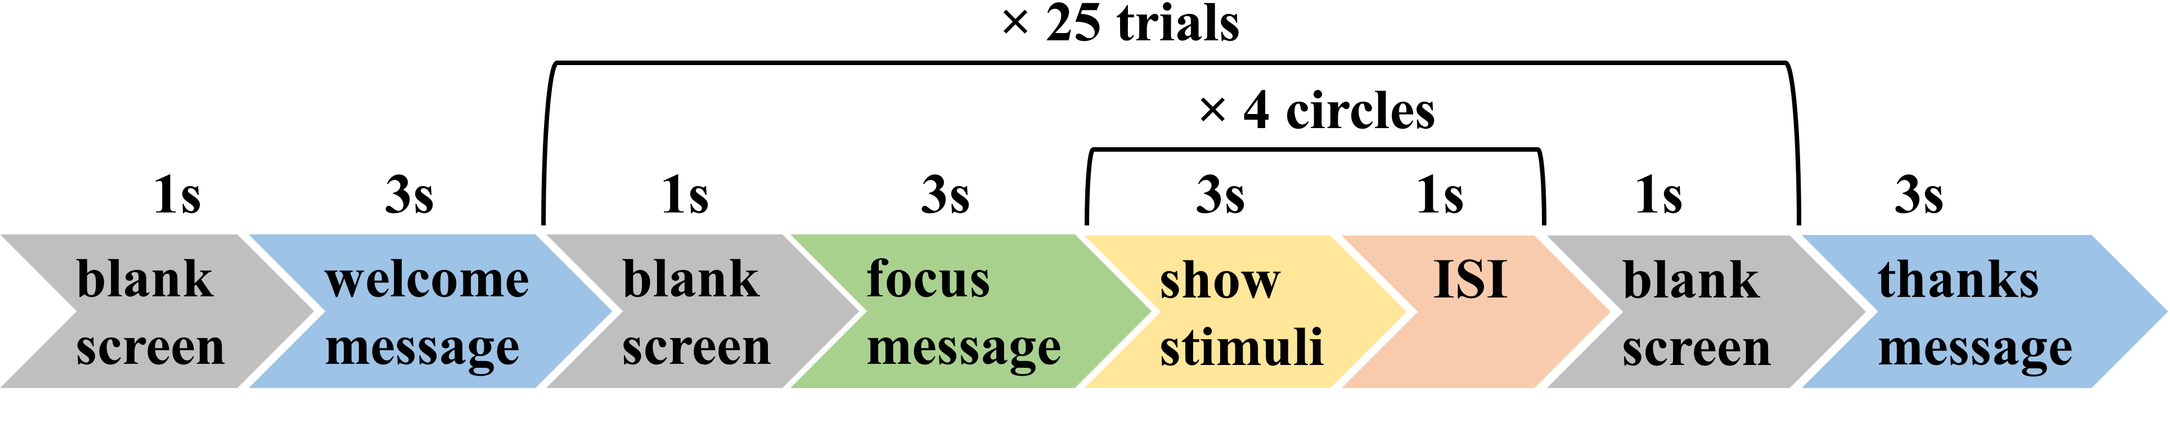

** Imagen modificada de [1]

‚ùó Si bien los investigadores ya tienen todo listo para comenzar los registros, se dan cuenta que
deben a√∫n completar los datos del experimento en su carpeta de informaci√≥n, en d√≥nde deben
clasificar su experimento seg√∫n los posibles tipos de BCI.

‚ùì ¬øLos ayudas indicando el tipo de BCI que dise√±aron? --> (utiliz√° las definiciones dadas en clase)

ü§ì Escrib√≠ tu rta. ac√°

## Parte II: pre-procesamientos b√°sicos

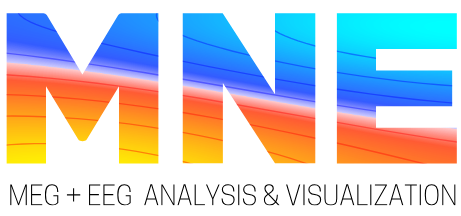

Durante este curso, vamos a utilizar la biblioteca [MNE-Python](https://mne.tools/stable/index.html), una biblioteca de c√≥digo abierto que permite visualizar, analizar y explorar datos neurofisiol√≥gicos. Si no est√°s a√∫n familiarizado con MNE-Python, te invito a chequear todos los tutoriales y ejemplos que ellos proveen (pero no ahora, esto no es un curso de MNE-Python üòú).

MNE-Python no est√° pre-instalada en el entornos virtual Python que tiene Colab. Como toda bibliotecas muy espec√≠fica, debe instalarse cada vez que abrimos la Colab üëá


In [2]:
# ejecut√° esta celda para instalar MNE
!pip install MNE


[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# !pip install pyqt5

# %matplotlib qt5

y voil√°, ya tenemos instalado MNE para comenzar üòé

In [4]:
# Importamos las bibliotecas y funciones
import numpy as np
import matplotlib.pyplot as plt
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne import Epochs, pick_types, events_from_annotations
import mne

Para comenzar vamos a visualizar una se√±al de EEG por primera vez. Vamos a utilizar datos facilmente accesibles mediante MNE. En particular vamos a utilizar datos ERPs adquiridos con EEG de 60 canales de manera simul√°nea con MEG.

Esta base de datos, al igual que todas las que utilizaremos en el curso, pertenece al [repositorio](https://mne.tools/stable/overview/datasets_index.html) de base de datos de MNE publicamente accesibles.

In [5]:
# importamos los datos
root = mne.datasets.sample.data_path() / "MEG" / "sample"
raw_file = root / "sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(raw_file, preload=False) # objeto rae the mne

Opening raw data file C:\Users\felip\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


`raw` es un objeto instanciado de la clase [Raw](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) de MNE. Como tal tiene varios m√©todos de gran utilidad, que hiremos utilizando a lo largo del curso. Te invito a chusmearlos üòâ

En este curso, nos vamos a centrar en trabajar con la se√±al de EEG. Para ello, vamos a utilizar la funci√≥n `pick` (m√©todo del objeto `raw`) a modo de restringir el estudio a s√≥lo un tipo de se√±al de inter√©s: el EEG

In [6]:
raw.pick(["eeg"]).load_data()

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.3 MB, data loaded>

‚ùì ¬øQue informaci√≥n de inter√©s nos devolvi√≥ esta funci√≥n? Miremos a:
1. La candidad de canales
2. Frecuencia de muestreo

### Miremos los datos crudos

Podemos graficar la posici√≥n de los electrodos, tanto en 2D como en 3D, y as√≠ darnos una ida qu√© √°reas o zonas de la corteza estos datos est√°n cubriendo

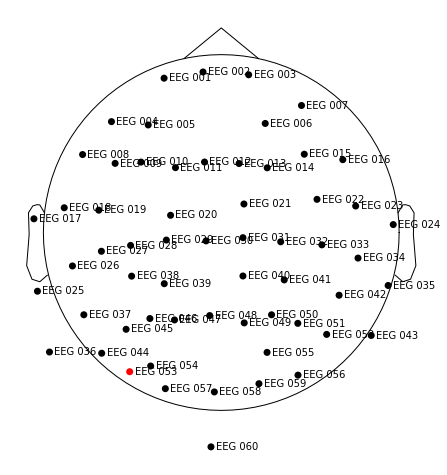

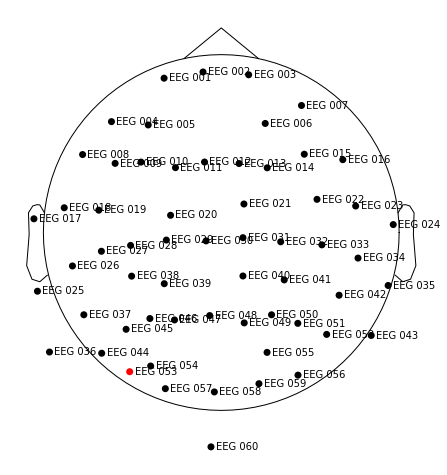

In [7]:
raw.plot_sensors(show_names=True)

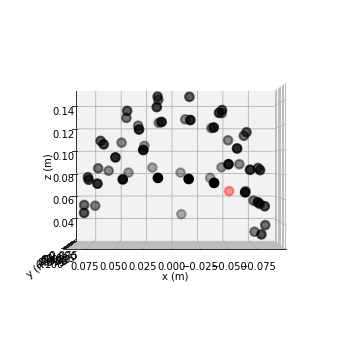

In [8]:
fig = raw.plot_sensors("3d")

Siempre que trabajamos con datos (cualquier sea su naturaleza) lo primero que tenemos que hacer es graficarlos. Aqu√≠ tiene sentido visualizar el EEG a lo largo del tiempo:

Using matplotlib as 2D backend.


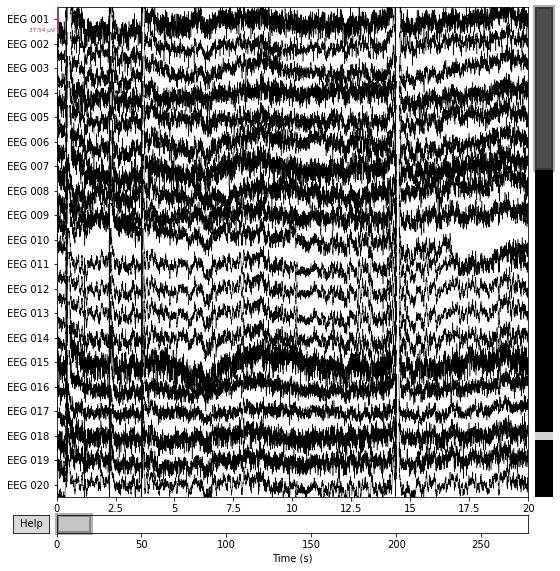

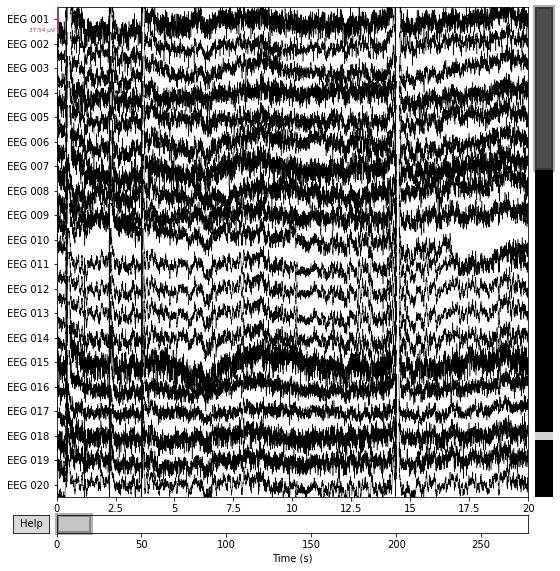

In [9]:
# podes jugar con el par√°metro start para ir viendo diferentes porciones del EEG
raw.plot(scalings='auto', duration=20.0, start=0.0)

üëÄ Como podemos observar, en estos primero 20 canales de EEG graficados, no todos los canales de EEG capturan la misma "se√±al" en el mismo instante de tiempo. Algunos son m√°s "ruidosos", otros tiene m√°s interferencia de transiciones lentas (asociadas a la baja frecuencia), etc.

### Datos y eventos

En BCI, los datos suelen venir acompa√±ados de informaci√≥n de eventos, los cuales son marcadores que indican el tiempo en el cu√°l sucedi√≥ tal o cu√°l evento. Esta informaci√≥n ser√° la que nos ayud√© evaluar la se√±al de EEG en segmentos de inter√©s.

In [10]:
# importamos los eventos

events_file = root / "sample_audvis_raw-eve.fif"
events = mne.read_events(events_file)

#imprimos
print(events)

[[ 27977      0      2]
 [ 28345      0      3]
 [ 28771      0      1]
 [ 29219      0      4]
 [ 29652      0      2]
 [ 30025      0      3]
 [ 30450      0      1]
 [ 30839      0      4]
 [ 31240      0      2]
 [ 31665      0      3]
 [ 32101      0      1]
 [ 32519      0      4]
 [ 32935      0      2]
 [ 33325      0      3]
 [ 33712      0      1]
 [ 34089      0      5]
 [ 34532      0      2]
 [ 34649      0     32]
 [ 34956      0      3]
 [ 35428      0      1]
 [ 35850      0      4]
 [ 36211      0      2]
 [ 36576      0      3]
 [ 37007      0      1]
 [ 37460      0      4]
 [ 37910      0      2]
 [ 38326      0      3]
 [ 38711      0      1]
 [ 39130      0      4]
 [ 39563      0      2]
 [ 39926      0      3]
 [ 40405      0      1]
 [ 40880      0      4]
 [ 41260      0      2]
 [ 41646      0      3]
 [ 42126      0      1]
 [ 42598      0      5]
 [ 42938      0     32]
 [ 42960      0      2]
 [ 43346      0      3]
 [ 43781      0      1]
 [ 44170      0 

‚ùì ¬øMirando este arreglo de eventos, qu√© te parece que indica la primer columna y la √∫ltima?

....

Es tarea de los experimentadores indicar a los usuarios de sus datos cu√°l es la relacci√≥n entre en n√∫mero del marcador y la tarea mental o evento esperado. Para estos datos sabemos que:

| Evento      | Marcador |
| ----------- | ----------- |
| auditory/left      | 1     
| auditory/rigth   | 2    
| visual/left   | 3      
| visual/rigth   | 4    
| smiley   | 5    
| buttonpress   | 32      

Lo escribimos como un diccionario üëá     

In [11]:
event_dict = {
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "smiley": 5,
    "buttonpress": 32,
}

Algo muy √∫til que podemos hacer antes de comenzar a trabajar con nuestros datos es graficar los eventos, y as√≠ entender cu√°l es la distribuci√≥n de eventos en mis datos

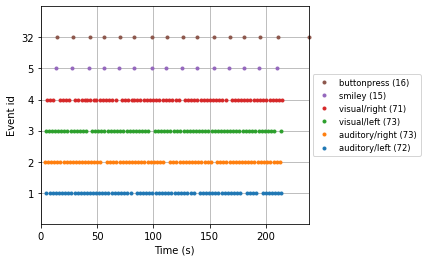

In [12]:
mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp, event_id=event_dict
);

Tambi√©n podemos graficar los datos crudos junto con la informaci√≥n de los eventos

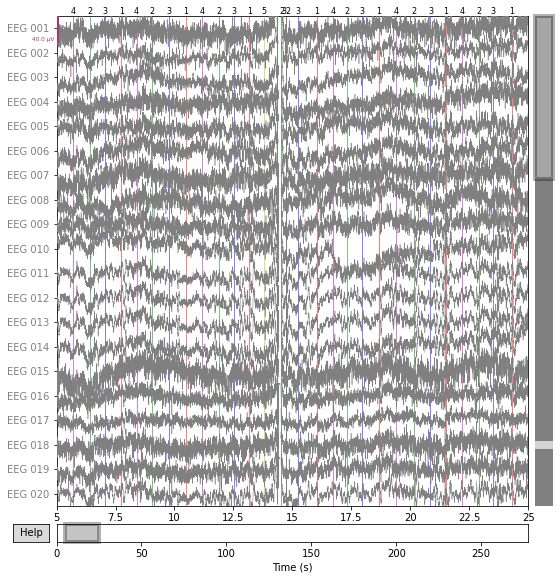

In [13]:
raw.plot(
    events=events,
    start=5,
    duration=20,
    color="gray",
    event_color={1: "r", 2: "g", 3: "b", 4: "m", 5: "y", 32: "k"},
);

‚ùì ¬øDe qu√© me servir√° graficar los datos crudos junto con los marcadores de los eventos?

....

### Pasos de acondicionamiento b√°sico

Cuando trabajamos con la se√±al de EEG hay una serie de pasos sencillos que me permiten acondicionar (de m√≠nima) mi se√±al. Entre ellos encontramos:

1. Detecci√≥n de canales "malos" (bad channels)
2. Filtrado de la se√±al
3. Submuestreo (downsampling)
4. Segmentaci√≥n (epoching)
5. Detecci√≥n de segmentos "malos" (bad trials)

¬øDebo aplicar todos estos pasos? La respuesta es NO. Depender√° mucho de tus datos y aplicaci√≥n.

De todos modos, veamos cada uno de estos pasos, por una cuesti√≥n did√°ctica üòâ

#### Detecci√≥n de canales "malos"

Esta tarea suele realizar mediante simple inspecci√≥n visual, tanto durante el mismo experimento o luego del registro de los datos. A priori quisieramos marcar como canales "malos" aquellos que se comportan extra√±amente durante todo o  la mayor parte del experimento.

‚ùî Ser√° que s√≥lo puedo marcarlos mediante observaci√≥n visual? No se te ocurre alguna forma de hacerlo de manera autom√°tica?



...

Algo natural que uno podr√≠a pensar es en mirar cu√°n alejada est√° la varianza de ese canal con respecto a todos los canales. Tenemos que pensar que las se√±ales de EEG son muestras aleatoreas identicamente distribuidas con una cierta distriubuci√≥n. Si suponemos que los datos provienen de una distribuci√≥n normal con media $\mu$ y desv√≠o $SE$, c√≥mo podr√© detectar aquellos canales "outliers"? Se te ocurre?

Vamos a implementarlo üëá

[0, 1, 2, 3, 6, 7]


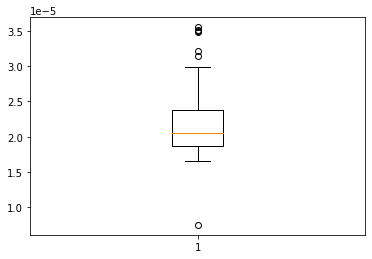

In [14]:
# guardo en un arreglo los datos crudos
data = raw.get_data()
nc, ns = np.shape(data) # cantidad de canales x cantidad de samples

# calculo el SE en cada canal
SE_all =[]
for nn in range(nc):
  SE_all.append(np.std(data[nn, :]))

#plotteo las distribuci√≥n
plt.boxplot(SE_all)

#calculos los percentiles
q=np.percentile(SE_all, q=90)

# cheque si el SE de cada canal no se aleja demasiado del global
bad_channels = []
for nn in range(nc):
  SE =  np.std(data[nn, :])
  if abs(SE) > q:
    bad_channels.append(nn)
print(bad_channels)

In [15]:
np.shape(data)


(60, 166800)

‚ùì Perooooo, siempre sentido mirar a la varianza que ocurre a los largo de toooodo mi registro? no s√© demasiado sensible o extricto este supuesto?

....

#### Filtrado

El filtrado de una se√±al permite eliminar o atenuar ciertas componentes frecuenciales en funci√≥n de una cierta frecuencia de corte (cuttoff frequency).

Pero antes de adentrarnos en c√≥mo filtrar nuestra se√±al de EEG, vamos a graficar en el espectro de frecuencias el EEG.

Sabemos que la se√±al de EEG superficial puede capturar se√±ales no m√°s lentas que 0.1 Hz y no m√°s r√°pidas que 100 Hz.  

Effective window size : 3.410 (s)


c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


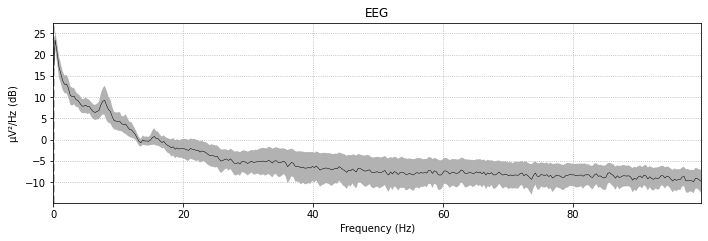

In [16]:
raw.compute_psd(fmax=100).plot(average=True, picks="data", exclude="bads");

La idea con un primer filtrado de datos es basicamente eliminar el ruido de continua (DC). Para eso, podemos filtrar nuestra se√±al con filtro pasa-alto. Se recomienda una frecuencia de corte no menor a 0.1 Hz.

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 993 samples (1.653 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Effective window size : 3.410 (s)


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.0s finished
c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


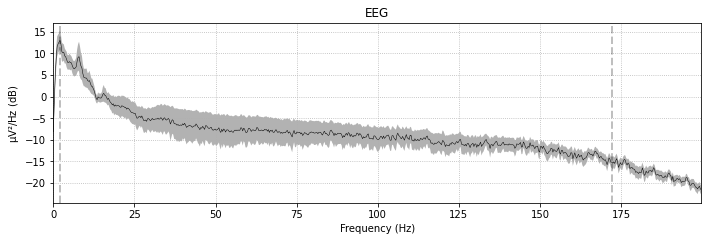

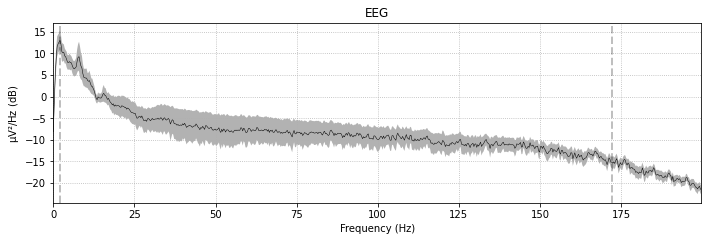

In [17]:
# ejecut√° esta celda cambiando la frecuencia de corte
cutoff = 2
raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
raw_highpass.compute_psd(fmax=200).plot(average=True, picks="data", exclude="bads")

‚ùî Pero, qu√© es lo que est√° ocurriendo?

Cuando uno filtra los datos, est√° aplicando un cierto umbral en el dominio de las frecuencias, en el cu√°l la informaci√≥n que no cumple con dicho umbral, es eliminada o atenuada.

En MNE-Python podemos facilmente visualizar el filtro aplicado, a modo de mejor comprender qu√© estamos haciendo:

Setting up high-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 993 samples (1.653 s)



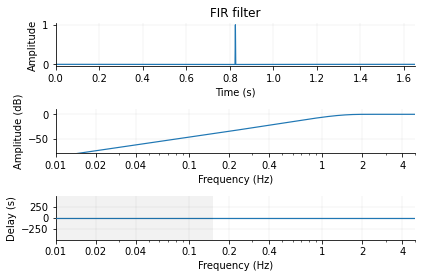

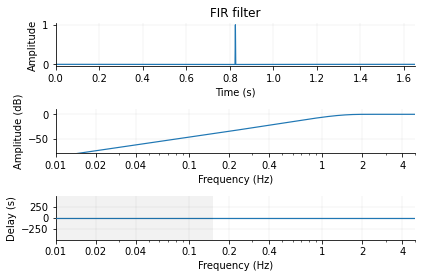

In [18]:
filter_params = mne.filter.create_filter(
    raw.get_data(), raw.info["sfreq"], l_freq=cutoff, h_freq=None)
mne.viz.plot_filter(filter_params, raw.info["sfreq"], flim=(0.01, 5))

#### Submuestro

En general, los sistemas de adquisici√≥n de EEG permiten muestrear temporalmente la se√±al a frecuencias muuuy altas. Pero, no siempre necesitamos tooodaaa esa infomraci√≥n (puede ser redundante).

Sabiendo a donde se encuentra mi frecuencia m√°xima de inter√©s, y siguiendo lo que dice el teorema de [Nysquit](https://en.wikipedia.org/wiki/Nyquist_frequency), podemos pensar que submuestrar mis datos a 200 Hz es un proceso "seguro".



Effective window size : 10.240 (s)


c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


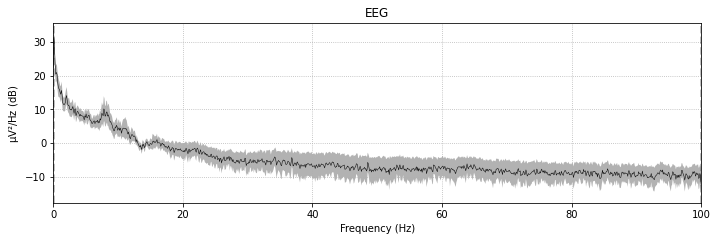

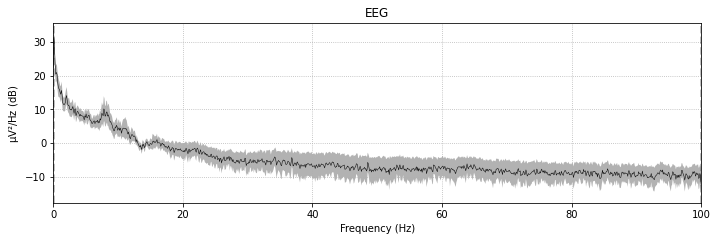

In [19]:
raw_highpass_downsampled = raw.copy().resample(sfreq=200)
raw_highpass_downsampled.compute_psd(fmax=100).plot(average=True, picks="data", exclude="bads")

In [20]:
# miramos el tama√±o de mis datos
data_downsampled = raw_highpass_downsampled.get_data()
print(np.shape(data_downsampled))

(60, 55543)


‚ùì ¬øLos datos se comprimieron? ¬øPerdieron informaci√≥n frecuencial?

...

‚ùï Es importante mencionar que para evitar el fenomeno de [aliasing](https://en.wikipedia.org/wiki/Anti-aliasing_filter), necesitamos filtrar nuestros datos antes de submuestrearlos con un filtro pasa-bajos. En MNE-Python, la funci√≥n resample ya realiza dicho paso por nosotro üôÇ

‚ùì ¬øQue consecuencias puede traer realizar el submuestreo en los datos crudos (raw)?

...

#### Segmentaci√≥n

La segmentaci√≥n es un proceso clave en el acondicionamiento de nuestros datos, pues al momento de hacer los registros el protocolo experimental puede contener ciertos eventos (tiempos) que no tiene nada de relevancia para un cierto estudio o an√°lisis en particular.

Asimismo segmentar los datos en ventanas de tiempo precisas permitir√°n un mejor an√°lisis posterior.

En el √°rea, se denomina "trial" o "√©poca" a un segmento de EEG de corta duraci√≥n que est√° asociado a un evento de inter√©s.

En MNE es MUY sencillo "epoquear" nuestros datos, pues la funci√≥n [Epochs](https://mne.tools/stable/generated/mne.Epochs.html) es muy potente y f√°cil de utilizar.  Tenemos que saber el tiempo m√≠nimo (tmin) y m√°ximo (tmax) del cu√°l nos alejamos del marcador del evento a la izquiera y a la derecha, respectivamente:

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 421 original time points ...
0 bad epochs dropped
You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


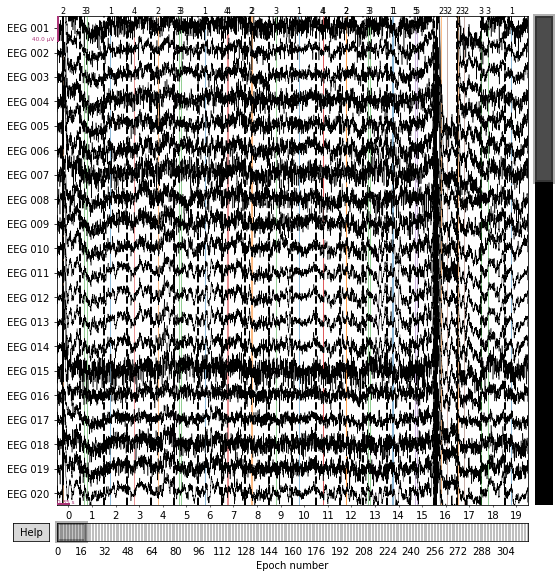

In [21]:
epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, event_id=event_dict, preload=True)
epochs.plot(events=events);

‚ùì ¬øSe podr√° aplicar submuestro de mis datos despu√©s de haberlos segmentados? ¬øVentajas, desventajas?

....

#### Detecci√≥n de segmentos "malos"

Puede suceder que en ciertos instantes de tiempos los datos tengan un comportamiento at√≠pico/raro.

Para maximizar la calidad del an√°lisis posterior de mis datos, puedo quitar de mi objeto `epochs` aquellos trials que est√°n defectuosos.

Existen varias alternativas para autom√°ticamente realizar esto. Se te ocurre alguna? ü§î

....

üëÄ veamos una ...

In [22]:
reject_criteria = dict(eeg=100e-6);
epochs.drop_bad(reject=reject_criteria);

    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033', 'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039', 'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045', 'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051', 'EEG 052', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 006', 'EEG 007', 'EEG 015'

‚ùì ¬øQu√© hace este criterio de rechazo?

...

Algo bastante √∫til es mirar qu√© canales contribuyeron mayoritariamente en las √©pocas malas

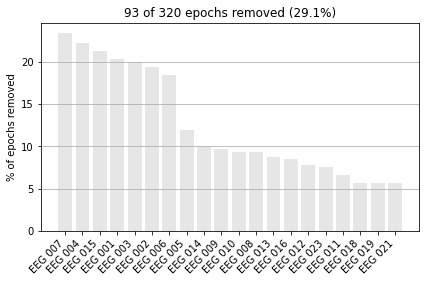

In [23]:
epochs.plot_drop_log();

‚ùì Hay una relaci√≥n entre los canales que m√°s contribuyen a las √©pocas malas y aquellos calculados en el primer paso?

¬øQu√© convendr√° si hay uno o m√°s canales contribuyendo a datos at√≠picos? Eliminar las √©pocas o eliminar los canales?

.....

‚ùï Diferentes criterios de eliminaci√≥n de √©pocas ya est√°n implementados en la funci√≥n [Epochs](https://mne.tools/stable/generated/mne.Epochs.html). Es importante ver el valor que toman por defectos los correspondiente par√°metros para que al momento de segmentar mis datos no se realice un proceso no deseado.

#### Mirando √©pocas

Una vez construido nuestro objeto `epochs`, podemos empezar a inspeccionar un poquito mi se√±al.

MNE provee funciones muy √∫tiles. Pero antes, te preguntaste c√≥mo acceder a s√≥lo el subconjunto de √©pocas para un cierto evento?

üëÄ veaaamos

In [24]:
l_vis = epochs["visual/left"]
print(np.shape(l_vis))

(52, 60, 421)


‚ùì ¬øQu√© denota el tama√±o del arreglo? ¬øCu√°ntas √©pocas tengo dentro de la categor√≠a "visual/left"?

...

Y finalmente vamos a poder graficar por ejemplo, el promedio de las √©pocas para todos los canales para el evento "visual/left"



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
()


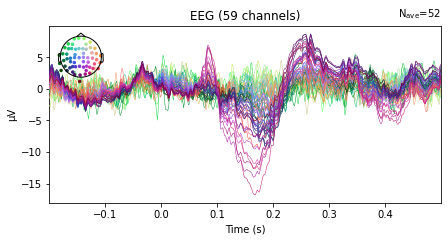

In [25]:
l_vis_mean = l_vis.average() # calculo el promedio
print(np.shape(l_vis_mean))
# grafico
l_vis_mean.plot(spatial_colors=True);

‚ùì ¬øSe observa el mismo comportamiento en todos los canales? ¬øSe observan potenciales marcados?

üí° Para responder esta pregunta record√° de qu√© tipo de paradigma provienen estos datos

#### El efecto del submuestreo

Para que termines de entender lo importante y relevante que puede ser filtrado y submuestrear nuestros datos te vamos a pedir que realices el siguiente "experimento":

1. Filtr√° los datos crudos a 1/3 de la frecuencia de muestreo final deseada y remuestre√° los datos crudos a la frecuencia de muestreo deseada. Se desea tener un frecuencia de muestreo de 200 Hz. Segment√° los datos y grafic√° el espectro para la categor√≠a "visual/left" antes y despu√©s de aplicado el proceso de remuestreo.
2. Filtr√° los datos crudos a 1/3 de la frecuencia de muestro final deseada, segment√° los datos utilizando el par√°metro `decimate` para submuestrear los datos. Como antes, la nueva frecuencia de muestreo deseada es 200 Hz. Grafic√° el espectro para la categor√≠a "visual/left" antes y despu√©s de aplicado el proceso de remuestreo.


In [26]:
#escrib√≥ t√∫ c√≥digo ac√°

‚ùì ¬øQu√© observas? ¬øQu√© proceso es el m√°s seguro?

....

## Parte III: ERPs

Los potenciales evocados relacionados a eventos (ERPs, por sus siglas en ingl√©s) suelen encontrarse entre los 1 a 12 Hz. Seg√∫n sea el tipo de est√≠mulo utilizado podr√°n tener morfolog√≠as diferentes, con latencias diferentes. En general solemos observarlos a partir de la promediaci√≥n coherente de segmentos de EEG.

##### Los datos

Vamos a utilizar los mismos datos que antes

In [27]:
root = mne.datasets.sample.data_path() / "MEG" / "sample"
raw_file = root / "sample_audvis_raw.fif"
raw_erps = mne.io.read_raw_fif(raw_file, preload=True)

events_file = root / "sample_audvis_raw-eve.fif"
events_erps = mne.read_events(events_file)

event_erps_dict = {
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "smiley": 5,
    "buttonpress": 32,
}

# sampling freq
sfreq = raw_erps.info["sfreq"]


Opening raw data file C:\Users\felip\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


#### Manos a la obra ü§ù

1. Cre√° el objeto `epochs_erp`, el cu√°l tiene los datos filtrados entre 0.1 a 40 Hz, con segmentos de EEG de 1 segundo de duraci√≥n extra√≠dos justo luego de la presentaci√≥n del est√≠mulo. Resamplea los datos tomando cada 4 muestras. No realices eliminaci√≥n de canales ni de √©pocas. No realices correcci√≥n de baseline. Al finalizar cheque√° el tama√±o de los datos extra√≠dos e indic√° si tiene sentido.

üí° TIPs

1. Estud√≠a bien los par√°metros de la funci√≥n [Epochs](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) de MNE
2. Record√° que los datos tienen varias modalidades. Seleccion√° solo EEG.

In [28]:
# escrib√≠ t√∫ c√≥digo ac√°

2. Realiz√° la promediaci√≥n coherente para las √©pocas correspondientes a est√≠mulo "visual/left". Realiz√° las graficas para un grupo de canales, seleccionado en funci√≥n de donde esperes que se observe m√°s notoriamente el EPR. Comenz√° promediando 2 segmentos de EEG hasta llegar a 60 en pasos de 2. Responde: ¬ødesde qu√© n√∫mero de trials promediados fuiste capaz de observar el ERP?

In [29]:
# escrib√≠ t√∫ c√≥digo ac√°

3. Repet√≠ el proceso pero ahora filtrando los datos entre 1 y 12 Hz. ¬øEs m√°s f√°cil visualizar la onda P300?

In [30]:
#Escrib√≠ t√∫ c√≥digo ac√°

## Parte IV: SSVEP

Los potenciales de SSVEP se caracterizan por responder a la frecuencia de estimulaci√≥n. Para
discriminar entre posibles comandos utilizando SSVEP, suele utilizarse la [transformada de Fourier](https://es.wikipedia.org/wiki/Transformada_de_Fourier)
y analizar la potencia del espectro en una banda acotada de inter√©s, de manera tal que la frecuencia fundamental indique el tipo de comando seleccionado por el usuario de la BCI.

#### Los datos

Estos datos tambi√©n son parte de las bases de datos accesibles mediante MNE. Es una base de datos en el cu√°l dos participantes observaban un tablero de ajedr√©s que invert√≠a los colores a frecuencias constantes de 12 o 15 Hz. Se utilizaron 32 canales de EEG. Los registros contemplan 10 trials de 20 s de duraci√≥n cada uno

In [31]:
data_path = mne.datasets.ssvep.data_path()
bids_fname = (
    data_path / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.vhdr"
)

raw_ssvep = mne.io.read_raw_brainvision(bids_fname, preload=True, verbose=False)
raw_ssvep.info["line_freq"] = 50.0

# Set montage
montage = mne.channels.make_standard_montage("easycap-M1")
raw_ssvep.set_montage(montage, verbose=False)

# event
event_ssvep_id = {"12hz": 255, "15hz": 155}
events_ssvep, _ = mne.events_from_annotations(raw_ssvep, verbose=False)

#channel names
ch_n = raw_ssvep.ch_names

Using default location ~/mne_data for ssvep...


 44%|################8                     | 17.5M/39.5M [01:07<01:21, 270kB/s]

KeyboardInterrupt: 

 44%|################8                     | 17.5M/39.5M [01:20<01:21, 270kB/s]

In [ ]:
# vemos los canales
raw_ssvep.plot_sensors(show_names=True);

#### Manos a la obra ü§ù

1. Cre√° el objeto `epochs_ssvep`, el cu√°l tiene los datos filtrados en 0.1 Hz, con segmentos de EEG de extra√≠dos 20 segundos luego de la presentaci√≥n del est√≠mulo con 1 segundo de espera. No realices eliminaci√≥n de canales ni de √©pocas. No realices correcci√≥n de baseline. Al finalizar chequea el tama√±o de los datos extra√≠dos e indic√° si tiene sentido.

In [ ]:
# escrib√≠ t√∫ c√≥digo ac√°

‚ùì ¬øSer√° relevante mirar las se√±ales en todos los canales? ¬øNo habr√° una regi√≥n de inter√©s (ROI)? ¬øPor qu√© esperamos 1 segundo para segmentar los datos?

...

## Parte V: SRMs

Los ritmos sensorimotores (SRMs, por sus siglas en ingl√©s) pueden observanse en la se√±al de EEG en tareas de imaginer√≠a motora. Estos potenciales suelen observarse en el dominio temporal entre los 8 a 30 Hz (onda $\mu$ y $\beta$). Asimismo, pueden observarse en el dominio temporal como un cambio en la amplitud con respecto a una estado de base

#### Los datos

Vamos a utilizar datos de imaginer√≠a motora. Esta base de datos fue originalmente publicada en [2] y consiste en varios experimentos de BCI realizados a la misma persona. En esta pr√°ctica vamos a utilizar las rondas correspondientes a imaginer√≠a motora de mano derecha vs. izq. del subjeto 1.

In [ ]:
from mne.datasets import eegbci

subject = 1  # sujeto
runs = [4, 8, 12]  # motor imagery: left vs right hand runs

raw_fnames = eegbci.load_data(subject, runs)
raw_srms = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])

# montage
eegbci.standardize(raw_srms)  # set channel names
montage = make_standard_montage("standard_1005")
raw_srms.set_montage(montage)

# eventos por anotaciones
dict_srm_event = dict(T1=1, T2=2) #right and left
events_srms, _ = events_from_annotations(raw_srms, event_id=dict_srm_event)


In [ ]:
# vemos los canales
raw_srms.plot_sensors(show_names=True);

#### Manos a la obra ü§ù

1.  Cre√° el objeto `epochs_rms` con segmentos de EEG de 5 segundos de duraci√≥n extra√≠dos 1 segundos antes de la presentaci√≥n del est√≠mulo. Seleccion√° solo los canales C3, C4, y Cz. Filtr√° los datos entre 1 a 40 Hz. Al finalizar chequea el tama√±o de los datos extra√≠dos e indic√° si √©ste tiene sentido.

In [ ]:
# escrib√≠ t√∫ c√≥digo ac√°

2. Grafica los espectros promedios de las √©pocas de imaginer√≠a motora (MI, por sus siglas en ingl√©s) derechas e izquierdas.

üí° TIP: chusme√° como usar el m√©tdo `compute_psd` de los objetos [Epochs](https://mne.tools/stable/generated/mne.Epochs.html) de MNE.

In [ ]:
# escrib√≠ t√∫ c√≥digo ac√°

3. Los patrones de sincronizaci√≥n y desincronizaci√≥n relacionado a eventos (ERD/ERS) pueden
detectarse mediante los siguientes pasos:



*   (1) Filtrado pasabanda;
*   (2) Rectificaci√≥n
*   (3) Promediaci√≥n sobre $N$ se√±ales rectificadas.


  Asimismo denotando con $A$ y $R$ a la potencia dentro de una banda de frecuencia de inter√©s
  luego del evento y dentro de un periodo de referencia (baseline), respectivamente, los valores de crecimiento y decrecimiento porcentuales pueden calcularse mediante $ERD\%$ = $(A-R)=R/100$.

  Mediante esta visualizaci√≥n, la escala muestra cambios de potencia entre 0% y 100%. Ambos
  procedimientos se detallan en la siguiente figura.

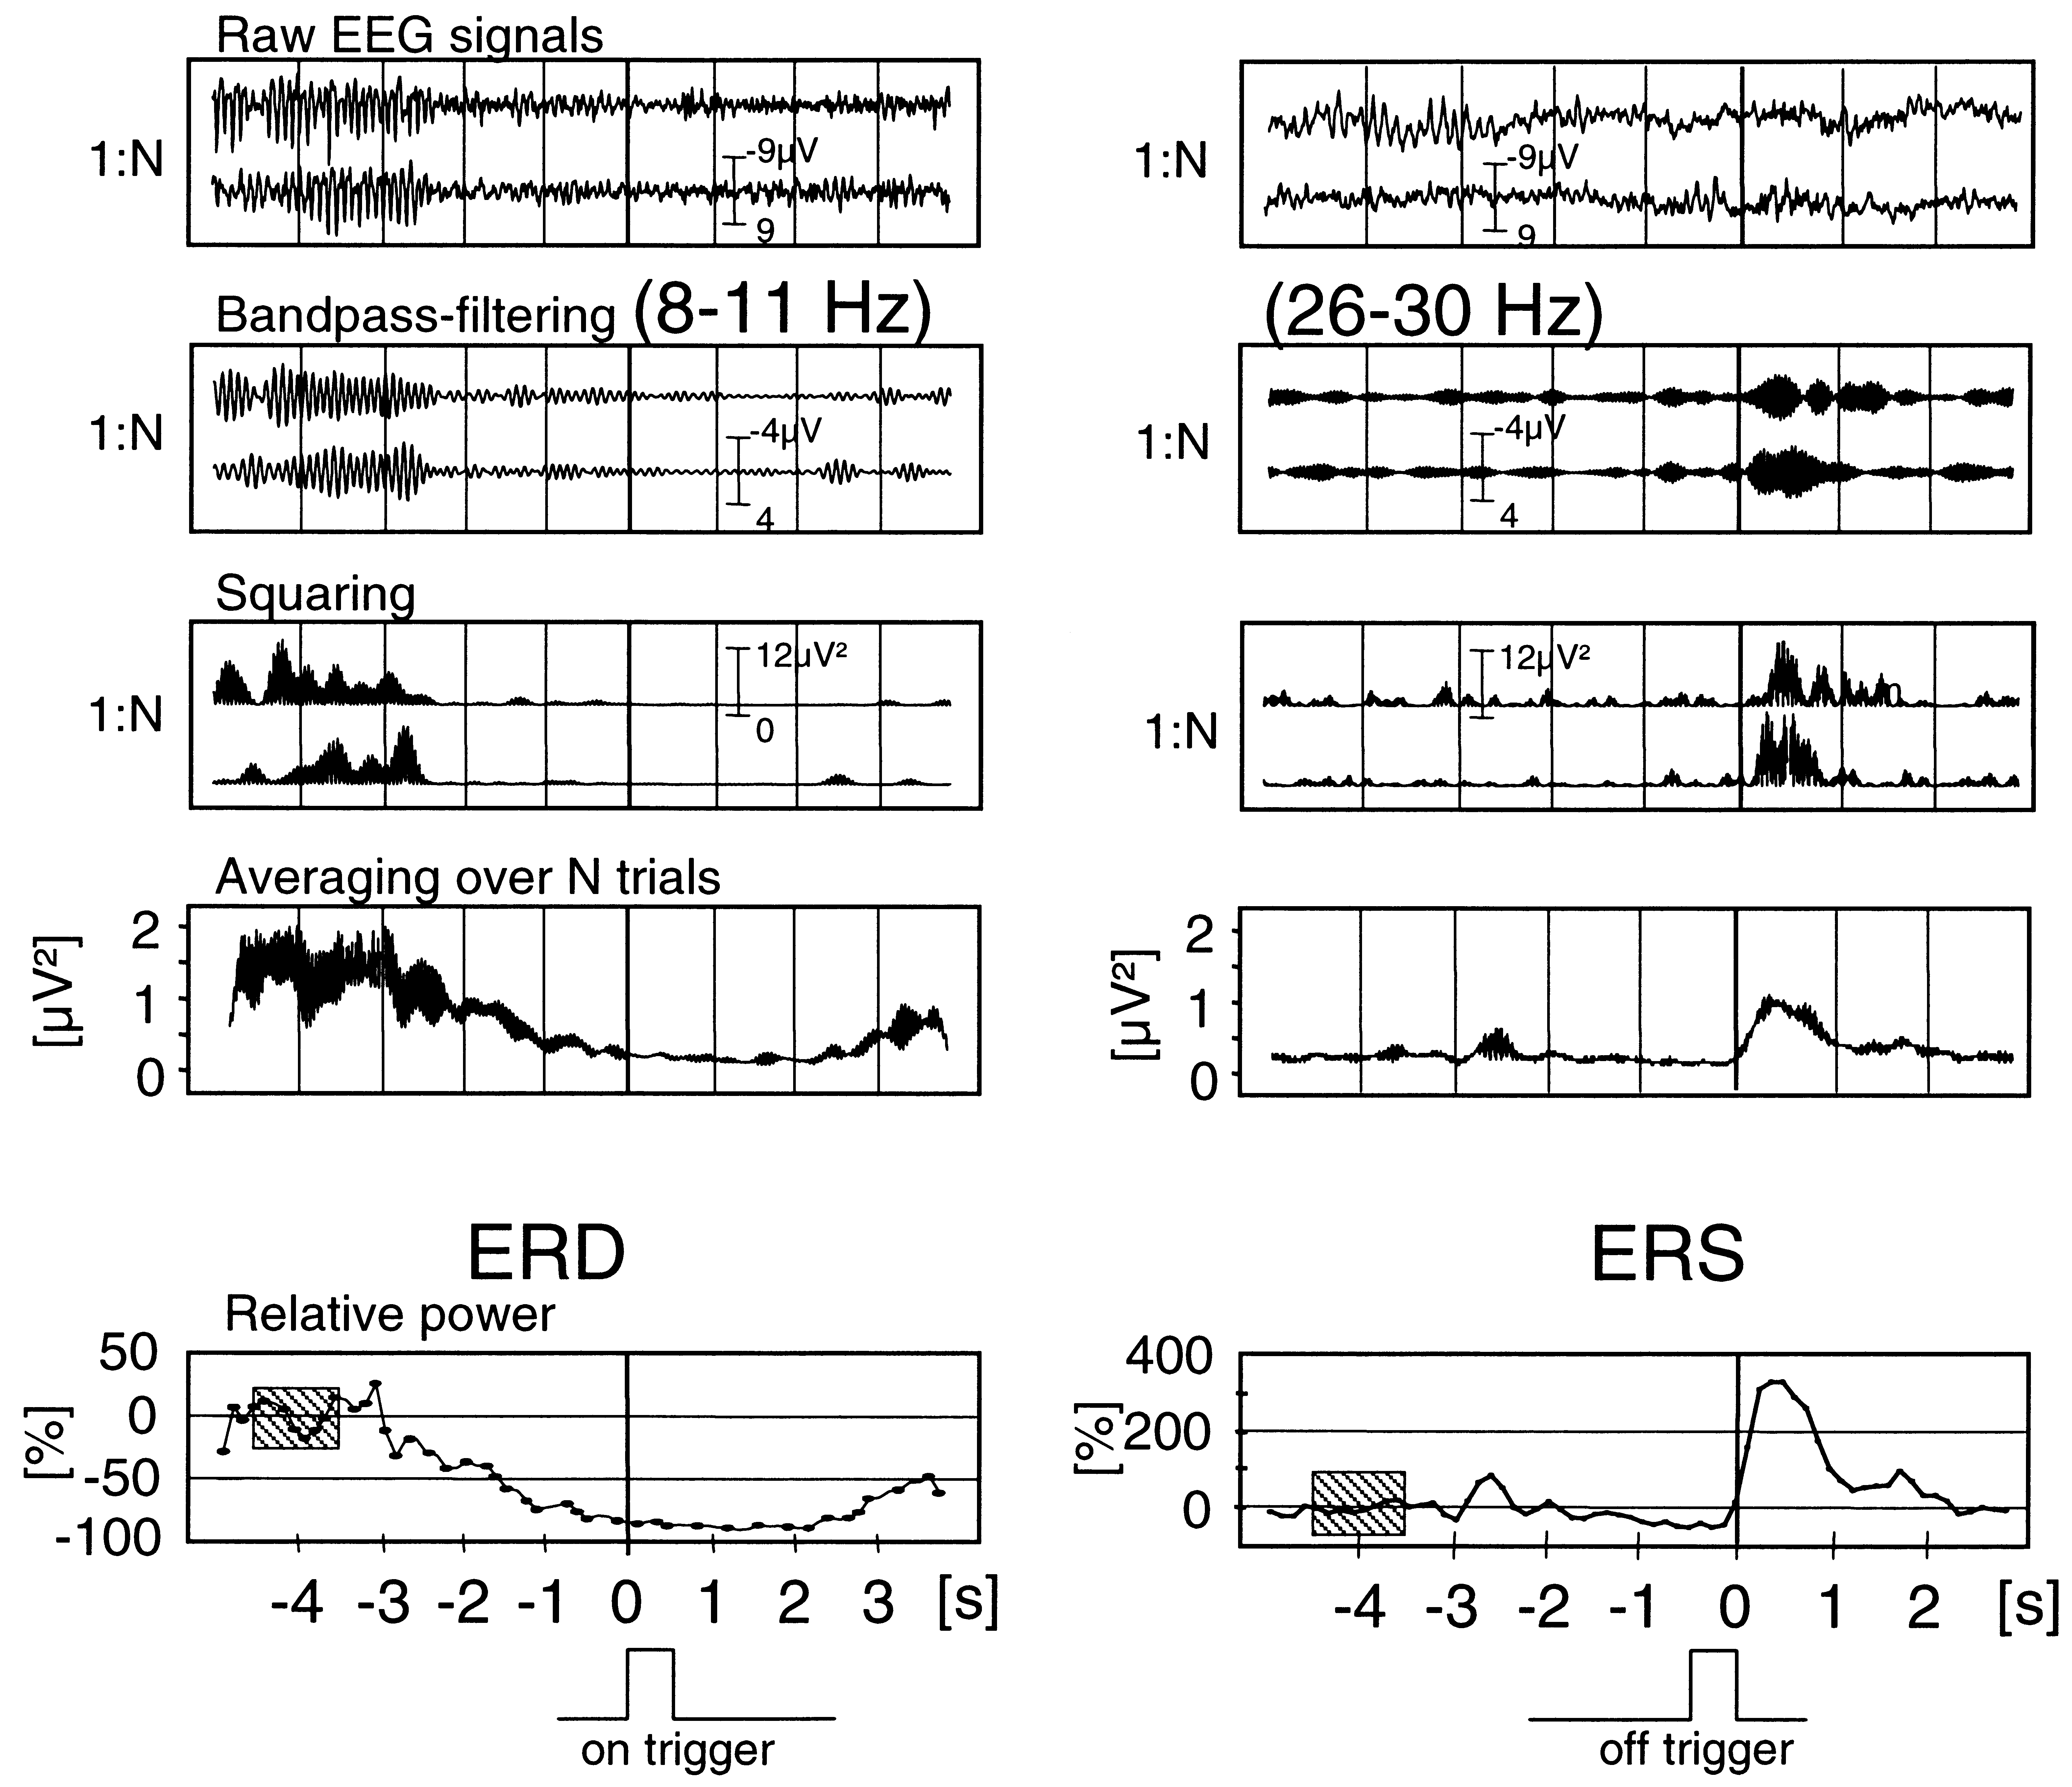

**Figura extra√≠da de [3]

  Se te pide que utilices las se√±ales de MI extra√≠das anteriormente en los canales 'C3' y 'C4'.
  Grafique los patrones ERD/ERS replicando la Figura 2 hasta el promedio sobre N trials.
  Para ello s√≥lo utilice los patrones que contienen MI. Como en la figura, filtr√° la se√±al entre 8 a 12 Hz. Indic√° el tiempo en el eje x relativo al evento (denotado como *trigger* en la figura).

In [ ]:
# escrib√≠ t√∫ c√≥digo ac√°

#### Bonus track

Veamos como se observan los ERD/s como mapas topogr√°ficos en el espacio de los sensores

Para mejor visualizar estos ERD/S en el topomap, vamos a crearnos √©pocas de 2 segundos de duraci√≥n 0.5 segundos luego de aplicado el est√≠mulo, sin selecci√≥n de un grupo de canales.

Luego vamos a separar las √©pocas izq. de las derechas

In [ ]:
# hacemos correcci√≥n del baseline
epochs_srm2= mne.Epochs(
    raw_srms,
    events_srms,
    dict_srm_event,
    -1,
    4,
    proj=False,
    picks="eeg",
    baseline=(-1, 0),
    preload=True,
)
# recortamos entre el segmento de inter√©s
epochs_srm2.crop(0.5, 2.5)

right_spectrum2 = epochs_srm2["T1"].compute_psd()
left_spectrum2 = epochs_srm2["T2"].compute_psd()



In [ ]:
fig, axs = plt.subplots(1, 5, figsize=[12, 1.2])
right_spectrum2.plot_topomap(ch_type="eeg", agg_fun=np.median, cmap='RdBu_r',
                            normalize=True, axes=axs);
fig.suptitle('Right hand MI', y=1.35);
fig, axs = plt.subplots(1, 5, figsize=[12, 1.2])
left_spectrum2.plot_topomap(ch_type="eeg", agg_fun=np.median, cmap='RdBu_r',
                           normalize=True, axes=axs);
fig.suptitle('Left hand MI', y=1.35);

‚ùì ¬øQu√© observas? ¬øHay alguna banda de frecuencia con ERD relacionados a la imaginer√≠a motora?

...

# Quiero saber m√°s ü§ì

‚ö° Para saber m√°s de filtrado, podes mirarte [√©ste](https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html) tutorial de MNE-Python

üëÄ Para chusmear m√°s de como visualizar ERD/ERS mir√°te [este](https://mne.tools/dev/auto_examples/time_frequency/time_frequency_erds.html) tutorial de MNE

üî¶ Para aprender sobre m√°s de c√≥mo trabajar con se√±ales de SSVEP mirate [este](https://mne.tools/stable/auto_tutorials/time-freq/50_ssvep.html#tut-ssvep) ejemplo

# Referencias

[1] Zafer ƒ∞≈ücan and Vadim V Nikulin. Steady state visual evoked potential (ssvep) based brain-computer interface (BCI) performance under different perturbations. PloS one, 13(1):e0191673, 2018.

[2] Gerwin Schalk, Dennis J. McFarland, Thilo Hinterberger, Niels Birbaumer, and Jonathan R. Wolpaw. BCI2000: a general-purpose brain-computer interface (BCI) system. IEEE Transactions on Biomedical Engineering, 51(6):1034‚Äì1043, 2004. doi:10.1109/TBME.2004.827072.

[3] Gert Pfurtscheller and FH Lopes Da Silva. Event-related eeg/meg synchronization and desynchronization: basic principles. Clinical neurophysiology, 110(11):1842-1857, 1999.